In [44]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import numpy as np
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

In [45]:
rho = np.loadtxt('rho_dua_dimensi_cartesian_data_tanpa_mp.csv', delimiter=',')
phi = np.loadtxt('phi_dua_dimensi_cartesian_data_tanpa_mp.csv', delimiter=',')

In [46]:
rho_train, rho_val, phi_train, phi_val = train_test_split(rho, phi, test_size=0.25, random_state=50)

In [47]:
rho_test = rho_train[-15000:]
phi_test = phi_train[-15000:]
rho_uji = rho_train[-20000:-15000]
phi_uji = phi_train[-20000:-15000]
rho_train = rho_train[:-20000]
phi_train = phi_train[:-20000]

In [48]:
print('rho_train shape=',rho_train.shape)
print('phi_train shape=',phi_train.shape)
print('rho_val shape=',rho_val.shape)
print('phi_val shape=',phi_val.shape)
print('rho_test shape=',rho_test.shape)
print('phi_test shape=',phi_test.shape)
print('rho_uji shape=',rho_uji.shape)
print('phi_uji shape=',phi_uji.shape)

rho_train shape= (77740, 400)
phi_train shape= (77740, 400)
rho_val shape= (32581, 400)
phi_val shape= (32581, 400)
rho_test shape= (15000, 400)
phi_test shape= (15000, 400)
rho_uji shape= (5000, 400)
phi_uji shape= (5000, 400)


In [49]:
rho_train = rho_train.reshape(rho_train.shape[0], 20, 20, 1)
phi_train = phi_train.reshape(phi_train.shape[0], 20, 20, 1)

rho_val = rho_val.reshape(rho_val.shape[0], 20, 20, 1)
phi_val = phi_val.reshape(phi_val.shape[0], 20, 20, 1)

rho_test = rho_test.reshape(rho_test.shape[0], 20, 20, 1)
phi_test = phi_test.reshape(phi_test.shape[0], 20, 20, 1)

rho_uji = rho_uji.reshape(rho_uji.shape[0], 20, 20, 1)
phi_uji = phi_uji.reshape(phi_uji.shape[0], 20, 20, 1)

In [50]:
# Define the input shape
input_shape = (20,20,1)

# Define the input layer
inputs = Input(shape=input_shape, name='input_layer')

In [53]:
# Add convolutional layers with small filters (3x3) and increasing number of filters
x = Conv2D(16, (3, 3), activation='relu', padding='same', name='conv_layer_1', kernel_regularizer=l2(0.01))(inputs)
x = MaxPooling2D((2, 2), name='pooling_layer_1')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_layer_2', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D((2, 2), name='pooling_layer_2')(x)
x = Dropout(rate=0.25)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_layer_3', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D((3, 3), name='pooling_layer_3')(x)
x = Dropout(rate=0.25)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_layer_4', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D((3, 3), name='pooling_layer_4')(x)
x = Dropout(rate=0.25)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_layer_5', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D((3, 3), name='pooling_layer_5')(x)
x = Dropout(rate=0.25)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_layer_6', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D((3, 3), name='pooling_layer_6')(x)
x = Dropout(rate=0.25)(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same', name='conv_layer_7', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D((3, 3), name='pooling_layer_7')(x)
x = Dropout(rate=0.25)(x)

ValueError: Exception encountered when calling layer "pooling_layer_4" (type MaxPooling2D).

Negative dimension size caused by subtracting 3 from 1 for '{{node pooling_layer_4/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 3, 3, 1], padding="VALID", strides=[1, 3, 3, 1]](Placeholder)' with input shapes: [?,1,1,128].

Call arguments received by layer "pooling_layer_4" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 128), dtype=float32)

In [ ]:
# Flatten the output and add fully connected layers to map the output to the desired output size
x = Flatten()(x)
x = Dense(512, activation='relu', name='fc_layer_01')(x)
#x = Dense(256, activation='relu', name='fc_layer_2')(x)
x = Dense(input_shape[0]*input_shape[1], activation='linear', name='output_layer')(x)
outputs = tf.reshape(x, [-1, input_shape[0], input_shape[1], 1])

In [ ]:
# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 20, 20, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 20, 20, 16)        160       
                                                                 
 conv_layer_2 (Conv2D)       (None, 20, 20, 32)        4640      
                                                                 
 pooling_layer_2 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 10, 10, 64)        18496     
                                                             

In [ ]:
# Compile the model with mean squared error as the loss function and Adam optimizer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(rho_train, phi_train, validation_data=(rho_val, phi_val), epochs=100, callbacks=[early_stop])

Epoch 1/100
2430/2430 [==============================] - 45s 19ms/step - loss: 0.0596 - mae: 0.1219 - val_loss: 0.5881 - val_mae: 0.5650
Epoch 2/100
2430/2430 [==============================] - 41s 17ms/step - loss: 0.0596 - mae: 0.1221 - val_loss: 0.4139 - val_mae: 0.4731
Epoch 3/100
2430/2430 [==============================] - 41s 17ms/step - loss: 0.0591 - mae: 0.1214 - val_loss: 0.3294 - val_mae: 0.4199
Epoch 4/100
2430/2430 [==============================] - 42s 17ms/step - loss: 0.0594 - mae: 0.1217 - val_loss: 0.3807 - val_mae: 0.4414
Epoch 5/100
2430/2430 [==============================] - 43s 18ms/step - loss: 0.0590 - mae: 0.1212 - val_loss: 0.3887 - val_mae: 0.4505
Epoch 6/100
2430/2430 [==============================] - 42s 17ms/step - loss: 0.0593 - mae: 0.1215 - val_loss: 0.3415 - val_mae: 0.4202
Epoch 7/100
2430/2430 [==============================] - 43s 18ms/step - loss: 0.0592 - mae: 0.1217 - val_loss: 0.5761 - val_mae: 0.5534
Epoch 8/100
2430/2430 [==================

In [ ]:
rho_fusion = np.loadtxt('rho_dua_puncak.csv', delimiter=',').reshape(1,20,20,1)
rho_fusion.shape
np.max(rho_fusion)

1.09224415071

In [ ]:
phi_fusion = np.loadtxt('phi_fusion_2D_GS.csv', delimiter=',').reshape(1,20,20,1)
phi_fusion.shape

(1, 20, 20, 1)

In [ ]:
test_loss, test_mae = model.evaluate(rho_fusion, phi_fusion)

1/1 [==============================] - 0s 41ms/step - loss: 0.1823 - mae: 0.3021


In [ ]:
rho_fusion = rho_fusion/np.max(rho_fusion)
phi_fusion_pred = model.predict(rho_fusion)
phi_fusion_pred.shape

1/1 [==============================] - 0s 29ms/step


(1, 20, 20, 1)

In [ ]:
phi_fusion_pred = phi_fusion_pred.reshape(20,20)

Text(0.5, 0.92, 'phi CNN')

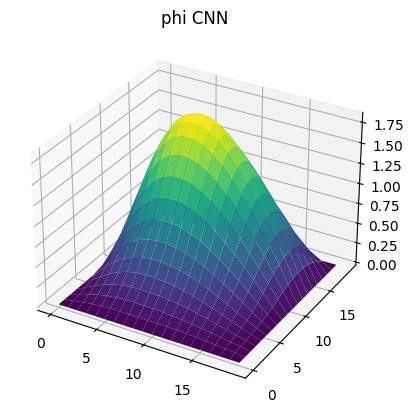

In [ ]:
plot_x = np.arange(20)
plot_y = np.arange(20)
PLOT_X, PLOT_Y = np.meshgrid(plot_x, plot_y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(PLOT_X, PLOT_Y, phi_fusion_pred, cmap='viridis')
ax.set_title('phi CNN')